In [77]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [78]:
###########DT##################
#credit
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.random_projection import SparseRandomProjection, johnson_lindenstrauss_min_dim
from sklearn.random_projection import GaussianRandomProjection
import sklearn.datasets as dt
from sklearn.metrics.pairwise import euclidean_distances

In [79]:
#load data
df = pd.read_csv(r'./credit.csv')

In [80]:
# Cleaning data

df = df.drop('ID', axis=1)
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()
df = df.rename(columns={'PAY_0':'PAY_1'})
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0 
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
df = df.rename(columns={'default payment next month':'default'})
fil = (df.PAY_1 == 0) & (df.PAY_2 == 0) & (df.PAY_3 == 0) & (df.PAY_4 == 0) & (df.PAY_5 == 0) & (df.PAY_6 == 0) & (df.default ==1)
df.loc[fil,'default'] = 0
fil = (df.PAY_1 > 0) & (df.PAY_2 > 0) & (df.PAY_3 > 0) & (df.PAY_4 > 0) & (df.PAY_5 > 0) & (df.PAY_6 > 0) & (df.default ==0)
df.loc[fil,'default'] = 1

In [81]:
y = df.pop('default')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [82]:
def convert_numarr_to_df (X_train,labels,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    labels = np.reshape(labels,(rows,1))
    X_train_vis = np.hstack((X_train,labels))
    features.append('class')
    #print(X_train_vis.shape)
    #print(features)
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=features)
    return df_vis

In [83]:
#k-Means
clusters = [2,3,4,5,6,7]
accuracy_list = []
y_train=y_train.astype('int')
params = {'alpha': [0.00001]
          #epochs
          , 'max_iter': [12]
          , 'hidden_layer_sizes' : [(8,)]
         }

time_list1 = []
start = time.time()

for cluster in clusters:
    columns = list(df.columns)
    c = KMeans(n_clusters=cluster, random_state=10)
    c_labels = c.fit_predict(X_train)
    df_converted = convert_numarr_to_df(X_train,c_labels,columns)
    hot_encoding = pd.get_dummies(df_converted['class'], prefix='class')
    df_merge = pd.concat([df_converted, hot_encoding], axis=1, sort=False)
    df_merge = df_merge.drop('class', 1)
    X_train_new = df_merge.to_numpy()
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_train_new, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_train_new, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)
end = time.time()
time_list1.append(end - start)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

In [84]:
accuracy_list


[0.9067916666666667,
 0.90675,
 0.9073333333333332,
 0.9082916666666666,
 0.9075,
 0.9071250000000001]

In [85]:
time_list1

[8.3788743019104]

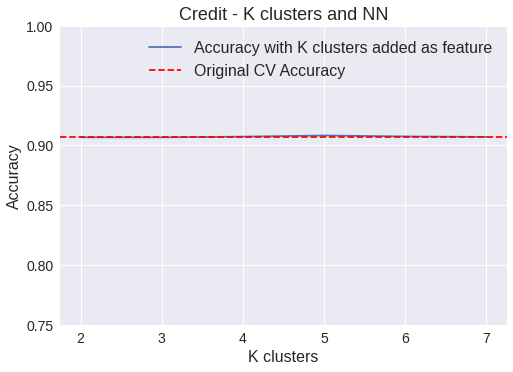

In [86]:
plt.style.use('seaborn')
plt.plot(clusters,accuracy_list, label = 'Accuracy with K clusters added as feature')
plt.xlabel('K clusters', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Credit - K clusters and NN', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.75,1)
# plt.plot(4, accuracy_list[2], 'bo', label = 'Best k based on elbow method') 
# plt.plot(5, accuracy_list[3], 'yo', label = 'Best k based on Silhouette score') 
# plt.plot(3, accuracy_list[1], 'go', label = 'Best k based on silhouette diagram') 
plt.axhline(y=0.90675,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()

In [87]:
#EM
clusters = [2,3,4,5,6]
accuracy_list = []
y_train=y_train.astype('int')
params = {'alpha': [0.00001]
          #epochs
          , 'max_iter': [12]
          , 'hidden_layer_sizes' : [(8,)]
         }
time_list2 = []
start = time.time()
for cluster in clusters:
    columns = list(df.columns)
    gmm = GaussianMixture(covariance_type = 'full', n_components = cluster, n_init = 10, random_state=1)
    c_labels = gmm.fit_predict(X_train)
    df_converted = convert_numarr_to_df(X_train,c_labels,columns)
    hot_encoding = pd.get_dummies(df_converted['class'], prefix='class')
    df_merge = pd.concat([df_converted, hot_encoding], axis=1, sort=False)
    #print(df_merge.shape)
    df_merge = df_merge.drop('class', 1)
    X_train_new = df_merge.to_numpy()
    grid_search_cv = GridSearchCV(MLPClassifier(random_state = 42, solver = 'lbfgs')
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
    
    grid_search_cv.fit(X_train_new, y_train)
    cv_accuracy = cross_val_score(grid_search_cv.best_estimator_, X_train_new, y_train, cv=5, scoring='accuracy').mean()
    accuracy_list.append(cv_accuracy)
end = time.time()
time_list2.append(end - start)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ceres-v2/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lb

In [88]:
accuracy_list

[0.9065000000000001,
 0.9070416666666666,
 0.9073333333333334,
 0.905875,
 0.907375]

In [91]:
time_list2

[15.853604316711426]

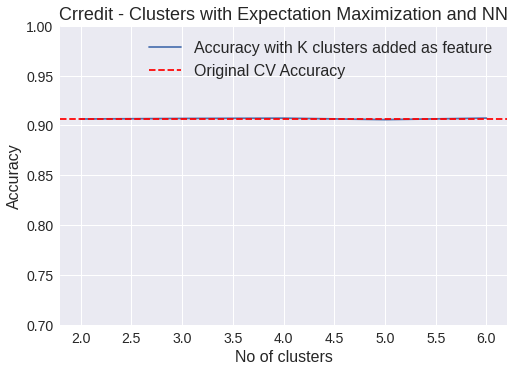

In [92]:
plt.style.use('seaborn')
plt.plot(clusters,accuracy_list, label = 'Accuracy with K clusters added as feature')
plt.xlabel('No of clusters', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Crredit - Clusters with Expectation Maximization and NN', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(0.7,1)
#plt.plot(4, accuracy_list[3], 'bo', label = 'Best k based on elbow method') 
# plt.plot(5, accuracy_list[3], 'bo', label = 'Best cluster based on BIC and AIC') 
plt.axhline(y=0.90675,color='r', linestyle='--', label = 'Original CV Accuracy')
plt.legend(fontsize=16)
plt.show()

In [93]:
#Measure wall clock time
y_train=y_train.astype('int')
y_test=y_test.astype('int')
#1.Orig model
time_list3 = []
accuracy_score_list = []
start = time.time()
orig_model = MLPClassifier(activation='relu', alpha=0.00001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=12,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

orig_model.fit(X_train,y_train)
y_test_pred = orig_model.predict(X_test)
#accuracy_score_list.append(accuracy_score(y_test, y_test_pred))

cv_accuracy = cross_val_score(orig_model, X_train, y_train, cv=5, scoring='accuracy').mean()
accuracy_score_list.append(cv_accuracy)
end = time.time()
time_list3.append(end - start)


In [94]:
time_list3

[0.5087852478027344]

In [95]:
accuracy_score_list

[0.9067500000000001]